In [2]:
%pylab inline
import camb
from camb import model, initialpower


Populating the interactive namespace from numpy and matplotlib


In [3]:
#Now get matter power spectra and sigma8 at redshift 0 and 0.8
pars = camb.CAMBparams()
pars.set_cosmology(H0=71, ombh2=0.02258, omch2=0.1109)
pars.InitPower.set_params(ns=0.963)
#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.695], kmax=100.0)

#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=100, npoints = 1000)
s8 = np.array(results.get_sigma8())

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

In [4]:
s8 

array([0.54248408])

TypeError: not enough arguments for format string

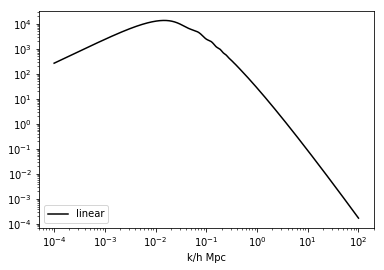

In [13]:
for i, (redshift, line) in enumerate(zip(z,['-','--'])):
    plt.loglog(kh, pk[i,:], color='k', ls = line)
 #  plt.loglog(kh_nonlin, pk_nonlin[i,:], color='r', ls = line)
plt.xlabel('k/h Mpc');
plt.legend(['linear','non-linear'], loc='lower left');
plt.title('Matter power at z=%s and z= %s'%tuple(z));

In [5]:
x=0.8**2/s8**2
x

array([2.17473319])

In [8]:
f=open("power_spec_simu_hearin.txt","w+")
for i in range(len(kh)):
    f.write("%le "%kh[i])
    f.write("%le\n"%pk[0,i])
f.close()

In [9]:
f=loadtxt("power_spec_simu_hearin.txt")
a=f[:,1]*0.8**2/s8**2
print(a)
f=open("power_spec_simu_hearin.txt","w+")
for i in range(len(kh)):
    f.write("%le "%kh[i])
    f.write("%le\n"%a[i])
f.close()

[5.84236851e+02 5.92065021e+02 5.99998013e+02 6.08037131e+02
 6.16183682e+02 6.24439404e+02 6.32805603e+02 6.41283800e+02
 6.49875301e+02 6.58581845e+02 6.67404738e+02 6.76345718e+02
 6.85406309e+02 6.94588033e+02 7.03892411e+02 7.13321402e+02
 7.22876527e+02 7.32559309e+02 7.42371488e+02 7.52314803e+02
 7.62391211e+02 7.72602236e+02 7.82949617e+02 7.93435310e+02
 8.04061274e+02 8.14829248e+02 8.25740972e+02 8.36798403e+02
 8.48003498e+02 8.59358432e+02 8.70864946e+02 8.82524995e+02
 8.94340973e+02 9.06314619e+02 9.18447890e+02 9.30743397e+02
 9.43202878e+02 9.55828727e+02 9.68622899e+02 9.81587789e+02
 9.94725787e+02 1.00803885e+03 1.02152937e+03 1.03519996e+03
 1.04905280e+03 1.06309005e+03 1.07731454e+03 1.09172867e+03
 1.10633462e+03 1.12113520e+03 1.13613303e+03 1.15133050e+03
 1.16673022e+03 1.18233502e+03 1.19814750e+03 1.21417028e+03
 1.23040641e+03 1.24685826e+03 1.26352890e+03 1.28042114e+03
 1.29753803e+03 1.31488218e+03 1.33245685e+03 1.35026487e+03
 1.36830950e+03 1.386593

<module 'numpy.fft' from '/home/arocher/.local/lib/python3.7/site-packages/numpy/fft/__init__.py'>